# Test of ABL spectra code

In [1]:
%%capture

# Change some display properties
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))
import matplotlib.pyplot as plt
import numpy as np
import windspectra
import os.path
from matplotlib.lines import Line2D
%matplotlib inline

In [2]:
# Average the spectra over multiple locations
# given by locations in planefilelist
def avgSpectraPlanefiles(planefilelist, verbose=True):
    # set initial values
    iplane = 0
    all_ulongavgs = []
    lent = 0
    # Loop through and get spectra
    for planefile in planefilelist:
        if not os.path.isfile(datadir+'/'+planefile): continue
        dat       = np.loadtxt(datadir+'/'+planefile)
        t   = dat[:,0]
        z   = dat[:,6]
        u   = dat[:,7]
        v   = dat[:,8]
        w   = dat[:,9]
        if ((iplane != 0) and (lent != len(t))): continue
        if verbose: print("Loaded plane "+planefile)
        ulong, ulat = windspectra.convertUxytoLongLat(u,v)
        all_ulongavgs.append(np.mean(ulong))
        f, Suu      = windspectra.avgWindSpectra(t, ulong, avgbins)
        f, Svv      = windspectra.avgWindSpectra(t, ulat,  avgbins)
        f, Sww      = windspectra.avgWindSpectra(t, w,     avgbins)
        if iplane == 0:
            lent    = len(t)
            favg    = f
            Suu_avg = Suu
            Svv_avg = Svv
            Sww_avg = Sww
        else:
            Suu_avg = Suu_avg + Suu
            Svv_avg = Svv_avg + Svv
            Sww_avg = Sww_avg + Sww
        iplane = iplane+1
        zavg   = np.mean(z)
    # Average the spectra
    Suu_avg = Suu_avg/iplane
    Svv_avg = Svv_avg/iplane
    Sww_avg = Sww_avg/iplane
    if verbose: print("Averaged over %i planes"%iplane)
    return favg, Suu_avg, Svv_avg, Sww_avg, np.mean(all_ulongavgs), zavg

In [3]:
# Define some dicts to save stuff
Suu_avg={}
Svv_avg={}
Sww_avg={}
avgUlong={}
zavg={}
favg={}
Su_Kai={}
Sv_Kai={}
Sw_Kai={}

In [4]:
# Define data locations and variables
datadir  = '/ascldap/users/lcheung/nscratch/Torque2020/Runs/neutral/05ms/05ms_iter07/statsData/extractpoints/HHplane_plane0'
planeprefix = 'HHplane_'
planenum = 0
jvector  = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550] #[0, 100, 200, 300, 400, 500] # [0, 100] #[0, 200, 400]
ivector  = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550] #[0, 100, 200, 300, 400, 500] #[0, 200, 400]

# Averaging bins
#avgbins  = [[1500.5,  15900.5], [15450.5, 16350.5]]
#avgbins  = [[15000,  16000], [15500, 16500]] 
#avgbins  = [[15000,  16300], [15650.5, 16950]] 
#avgbins  = [[15000,  16600], [15800.5, 17400]] 
#avgbins  = [[15000,  16999.5], [16000.5, 18000]] 
#avgbins  = [[15000,  17600], [16300.5, 18900]] 
avgbins  = [[15000,  18000], [16500.5, 19500]] 

# Friction velocity.  Eventually this should be pulled from the ABL stats file
utau     = 0.1501

In [5]:
# Construct the list of planefiles
s='20'
planefiles=[]
for j in jvector:
    for i in ivector:
        planefiles.append(planeprefix+'%i_%i_%i.dat'%(planenum, j,i))
favg[s], Suu_avg[s], Svv_avg[s], Sww_avg[s], avgUlong[s], zavg[s] = avgSpectraPlanefiles(planefiles, verbose=True)

Loaded plane HHplane_0_0_0.dat
Loaded plane HHplane_0_0_50.dat
Loaded plane HHplane_0_0_100.dat
Loaded plane HHplane_0_0_150.dat
Loaded plane HHplane_0_0_200.dat
Loaded plane HHplane_0_0_250.dat
Loaded plane HHplane_0_0_300.dat
Loaded plane HHplane_0_0_350.dat
Loaded plane HHplane_0_0_400.dat
Loaded plane HHplane_0_0_450.dat
Loaded plane HHplane_0_0_500.dat
Loaded plane HHplane_0_0_550.dat
Loaded plane HHplane_0_50_0.dat
Loaded plane HHplane_0_50_50.dat
Loaded plane HHplane_0_50_100.dat
Loaded plane HHplane_0_50_150.dat
Loaded plane HHplane_0_50_200.dat
Loaded plane HHplane_0_50_250.dat
Loaded plane HHplane_0_50_300.dat
Loaded plane HHplane_0_50_350.dat
Loaded plane HHplane_0_50_400.dat
Loaded plane HHplane_0_50_450.dat
Loaded plane HHplane_0_50_500.dat
Loaded plane HHplane_0_50_550.dat
Loaded plane HHplane_0_100_0.dat
Loaded plane HHplane_0_100_50.dat
Loaded plane HHplane_0_100_100.dat
Loaded plane HHplane_0_100_150.dat
Loaded plane HHplane_0_100_200.dat
Loaded plane HHplane_0_100_250

In [6]:
# Get the equivalent Kaimal spectra
#avgUlong = np.mean(all_ulongavgs)
s='20'
print("Avg Ulong = %f zavg = %f"%(avgUlong[s], zavg[s]))
Su_Kai[s] = windspectra.getKaimal(favg[s], zavg[s], avgUlong[s])
Sv_Kai[s] = windspectra.getKaimal(favg[s], zavg[s], avgUlong[s], params=windspectra.vKaimalconst)
Sw_Kai[s] = windspectra.getKaimal(favg[s], zavg[s], avgUlong[s], params=windspectra.wKaimalconst)

# Get the IEC Kaimal spectra
stdU = 0.078*avgUlong[s] #0.0548*avgUlong
Su_IECKai = windspectra.getIECKaimal(favg[s], zavg[s], avgUlong[s], sigma=float(stdU), direction='u')
Sv_IECKai = windspectra.getIECKaimal(favg[s], zavg[s], avgUlong[s], sigma=float(0.8*stdU), direction='v')
Sw_IECKai = windspectra.getIECKaimal(favg[s], zavg[s], avgUlong[s], sigma=float(0.5*stdU), direction='w')

fmax = 0.6*avgUlong[s]/(8*np.sqrt(2)*10)
print("fmax = %f"%fmax)
print("nmax = %f"%(fmax*zavg[s]/utau))

Avg Ulong = 4.988432 zavg = 20.000000
fmax = 0.026455
nmax = 3.525004


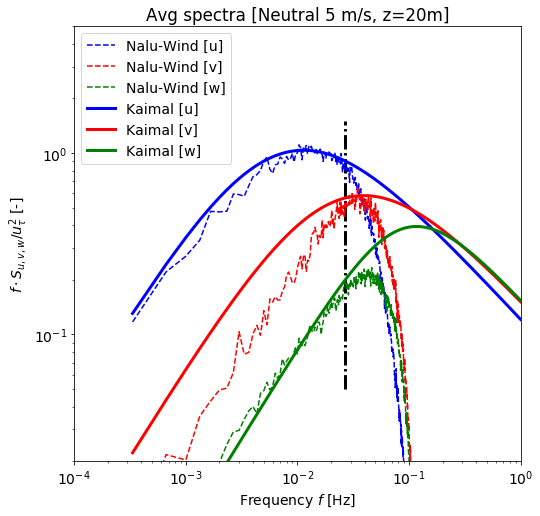

In [7]:
# Plot the longitudinal spectral
plt.figure(figsize=(8,8))
plt.rc('font', size=14)
plt.rc('xtick', labelsize=14)
# Plot the Nalu Wind spectra
s='20'
f=favg[s]
plt.loglog(f, f*Suu_avg[s]/utau**2, 'b--', label='Nalu-Wind [u]')
plt.loglog(f, f*Svv_avg[s]/utau**2, 'r--', label='Nalu-Wind [v]')
plt.loglog(f, f*Sww_avg[s]/utau**2, 'g--', label='Nalu-Wind [w]')

# Plot Kaimal
plt.loglog(f, Su_Kai[s],'b', lw=3, label='Kaimal [u]')
plt.loglog(f, Sv_Kai[s],'r', lw=3, label='Kaimal [v]')
plt.loglog(f, Sw_Kai[s],'g', lw=3, label='Kaimal [w]')

# Plot IEC Kaimal
#plt.loglog(favg, favg*Su_IECKai/utau**2,'b', lw=1, label='Kaimal [u]')
#plt.loglog(favg, favg*Sv_IECKai/utau**2,'r', lw=1, label='Kaimal [v]')
#plt.loglog(favg, favg*Sw_IECKai/utau**2,'g', lw=1, label='Kaimal [w]')

# Plot where the spectral cut-off is
plt.vlines(fmax, 5e-2, 1.5,lw=3, linestyle='-.')

#plt.vlines(0.0190, 1e-0, 1.5, lw=1, linestyle='--')
#plt.vlines(0.0115, 1e-0, 1.5, lw=1, linestyle='--')
#plt.vlines(0.0075, 7e-1, 1.5, lw=1, linestyle='--')
#plt.vlines(0.0050, 7e-1, 1.5, lw=1, linestyle='--')
#plt.vlines(0.0025, 7e-1, 1.5, lw=1, linestyle='--')

# Formatting options
plt.ylim([2E-2, 5]);
plt.xlim([1E-4, 1]);
plt.xlabel('Frequency $f$ [Hz]')
plt.ylabel('$f\cdot S_{u,v,w}/u_{\\tau}^2$ [-]')
plt.title('Avg spectra [Neutral 5 m/s, z=%sm]'%s)
plt.legend(loc='upper left')
#plt.grid()

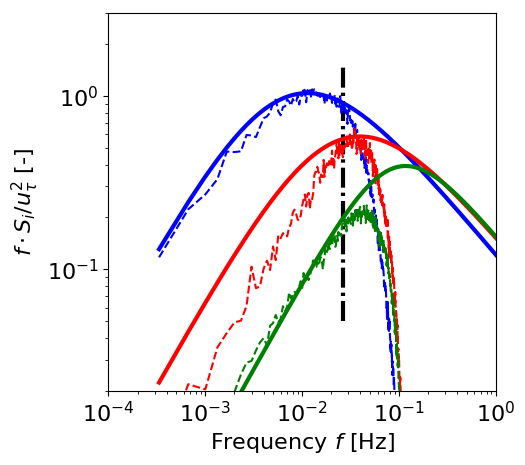

In [8]:
# --- Paper version ---
plt.figure(figsize=(5,5),dpi=100)
plt.rc('font', size=16)
plt.rc('xtick', labelsize=16)
# Plot the Nalu Wind spectra
s='20'
f=favg[s]
plt.loglog(f, f*Suu_avg[s]/utau**2, 'b--', label='Nalu-Wind [u]')
plt.loglog(f, f*Svv_avg[s]/utau**2, 'r--', label='Nalu-Wind [v]')
plt.loglog(f, f*Sww_avg[s]/utau**2, 'g--', label='Nalu-Wind [w]')

# Plot Kaimal
plt.loglog(f, Su_Kai[s],'b', lw=3, label='Kaimal [u]')
plt.loglog(f, Sv_Kai[s],'r', lw=3, label='Kaimal [v]')
plt.loglog(f, Sw_Kai[s],'g', lw=3, label='Kaimal [w]')

# Plot where the spectral cut-off is
plt.vlines(fmax, 5e-2, 1.5,lw=3, linestyle='-.')

# Formatting options
plt.ylim([2E-2, 3]);
plt.xlim([1E-4, 1]);
plt.xlabel('Frequency $f$ [Hz]')
plt.ylabel('$f\cdot S_{i}/u_{\\tau}^2$ [-]')
#plt.tight_layout()
#plt.title('Avg spectra [Neutral 5 m/s, z=%sm]'%s)
#plt.legend(loc='upper left')

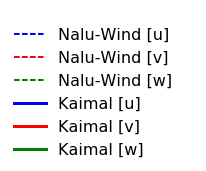

In [9]:
# --- just make a legend ---
legend_el = [Line2D([0],[0], linestyle='--', color='b', linewidth=2, label='Nalu-Wind [u]'),
             Line2D([0],[0], linestyle='--', color='r', linewidth=2, label='Nalu-Wind [v]'),
             Line2D([0],[0], linestyle='--', color='g', linewidth=2, label='Nalu-Wind [w]'),
             Line2D([0],[0], linestyle='-',  color='b', linewidth=3, label='Kaimal [u]'),
             Line2D([0],[0], linestyle='-',  color='r', linewidth=3, label='Kaimal [v]'),
             Line2D([0],[0], linestyle='-',  color='g', linewidth=3, label='Kaimal [w]'),
            ]
plt.figure(figsize=(3,1))
plt.legend(handles=legend_el, fontsize=16, frameon=False)
plt.axis('off')
plt.tight_layout()

In [10]:
# Define data locations and variables
datadir  = '/ascldap/users/lcheung/nscratch/Torque2020/Runs/neutral/05ms/05ms_iter07/statsData/extractpoints/HHplane_plane1'
planeprefix = 'HHplane_'
planenum = 1
jvector  = [0, 100, 200, 300, 400, 500] # [0, 100] #[0, 200, 400]
ivector  = [0, 100, 200, 300, 400, 500] #[0, 200, 400]

# Averaging bins
#avgbins  = [[15000,  16300], [15650.5, 16950]] 
avgbins  = [[15000,  16600], [15800.5, 17400]]
# Friction velocity.  Eventually this should be pulled from the ABL stats file
utau     = 0.1501

# Construct the list of planefiles
planefiles=[]
for j in jvector:
    for i in ivector:
        planefiles.append(planeprefix+'%i_%i_%i.dat'%(planenum, j,i))
        
# Get the averaged spectra
s='40'
favg[s], Suu_avg[s], Svv_avg[s], Sww_avg[s], avgUlong[s], zavg[s] = avgSpectraPlanefiles(planefiles, verbose=False)

In [11]:
# Get the Kaimal spectra
s = '40'
stdU = 0.06*avgUlong[s]

uparams={'a':75.0, 'b':33.0, 'alphaExp':1.0,'betaExp':5.0/3}
print("Avg Ulong = %f zavg = %f"%(avgUlong[s], zavg[s]))
Su_Kai[s] = windspectra.getKaimal(favg[s], zavg[s], avgUlong[s])
Sv_Kai[s] = windspectra.getKaimal(favg[s], zavg[s], avgUlong[s], params=windspectra.vKaimalconst)
Sw_Kai[s] = windspectra.getKaimal(favg[s], zavg[s], avgUlong[s], params=windspectra.wKaimalconst)

Su_IECKai = windspectra.getIECKaimal(favg[s], zavg[s], avgUlong[s], sigma=float(stdU), direction='u')
Sv_IECKai = windspectra.getIECKaimal(favg[s], zavg[s], avgUlong[s], sigma=float(0.8*stdU), direction='v')
Sw_IECKai = windspectra.getIECKaimal(favg[s], zavg[s], avgUlong[s], sigma=float(0.5*stdU), direction='w')

Avg Ulong = 5.281106 zavg = 40.000000


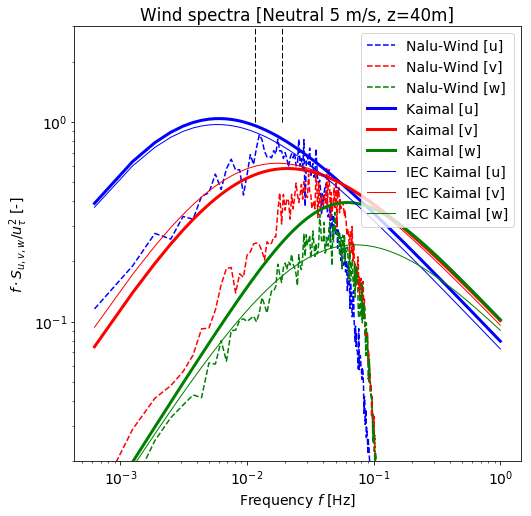

In [12]:
# Plot the longitudinal spectral
plt.figure(figsize=(8,8))
plt.rc('font', size=14)
plt.rc('xtick', labelsize=14)
s='40'
f=favg[s]
utauscale=utau
# Plot the Nalu Wind spectra
plt.loglog(f, f*Suu_avg[s]/utauscale**2, 'b--', label='Nalu-Wind [u]')
plt.loglog(f, f*Svv_avg[s]/utauscale**2, 'r--', label='Nalu-Wind [v]')
plt.loglog(f, f*Sww_avg[s]/utauscale**2, 'g--', label='Nalu-Wind [w]')

# Plot Kaimal
plt.loglog(f, Su_Kai[s],'b', lw=3, label='Kaimal [u]')
plt.loglog(f, Sv_Kai[s],'r', lw=3, label='Kaimal [v]')
plt.loglog(f, Sw_Kai[s],'g', lw=3, label='Kaimal [w]')

plt.loglog(f, f*Su_IECKai/utauscale**2, 'b', lw=1, label='IEC Kaimal [u]')
plt.loglog(f, f*Sv_IECKai/utauscale**2, 'r', lw=1, label='IEC Kaimal [v]')
plt.loglog(f, f*Sw_IECKai/utauscale**2, 'g', lw=1, label='IEC Kaimal [w]')

# Plot peak lines
plt.vlines(0.0190, 1e-0, 3, lw=1, linestyle='--')
plt.vlines(0.0115, 1e-0, 3, lw=1, linestyle='--')

# Formatting options
plt.ylim([2E-2, 3]);
plt.xlabel('Frequency $f$ [Hz]')
plt.ylabel('$f\cdot S_{u,v,w}/u_{\\tau}^2$ [-]')
plt.title('Wind spectra [Neutral 5 m/s, z=%sm]'%s)
plt.legend(loc='upper right')

In [13]:
# Define data locations and variables
datadir  = '/ascldap/users/lcheung/nscratch/Torque2020/Runs/neutral/05ms/05ms_iter07/statsData/extractpoints/HHplane_plane2'
planeprefix = 'HHplane_'
planenum = 2
jvector  = [0, 100, 200, 300, 400, 500] # [0, 100] #[0, 200, 400]
ivector  = [0, 100, 200, 300, 400, 500] #[0, 200, 400]

# Averaging bins
avgbins  = [[15000,  16300], [15650.5, 16950]] 
# Friction velocity.  Eventually this should be pulled from the ABL stats file
utau     = 0.1501

# Construct the list of planefiles
planefiles=[]
for j in jvector:
    for i in ivector:
        planefiles.append(planeprefix+'%i_%i_%i.dat'%(planenum, j,i))
        
# Get the averaged spectra
s='60'
favg[s], Suu_avg[s], Svv_avg[s], Sww_avg[s], avgUlong[s], zavg[s] = avgSpectraPlanefiles(planefiles, verbose=False)

In [14]:
print("Avg Ulong = %f zavg = %f"%(avgUlong[s], zavg[s]))
Su_Kai[s] = windspectra.getKaimal(favg[s], zavg[s], avgUlong[s])
Sv_Kai[s] = windspectra.getKaimal(favg[s], zavg[s], avgUlong[s], params=windspectra.vKaimalconst)
Sw_Kai[s] = windspectra.getKaimal(favg[s], zavg[s], avgUlong[s], params=windspectra.wKaimalconst)

Avg Ulong = 5.473322 zavg = 60.000000


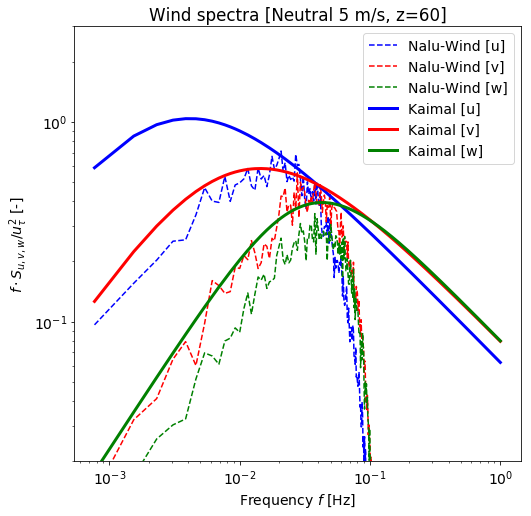

In [15]:
# Plot the longitudinal spectral
plt.figure(figsize=(8,8))
plt.rc('font', size=14)
plt.rc('xtick', labelsize=14)
utauscale=utau
s='60'
f=favg[s]
# Plot the Nalu Wind spectra
plt.loglog(f, f*Suu_avg[s]/utauscale**2, 'b--', label='Nalu-Wind [u]')
plt.loglog(f, f*Svv_avg[s]/utauscale**2, 'r--', label='Nalu-Wind [v]')
plt.loglog(f, f*Sww_avg[s]/utauscale**2, 'g--', label='Nalu-Wind [w]')

# Plot Kaimal
plt.loglog(f, Su_Kai[s],'b', lw=3, label='Kaimal [u]')
plt.loglog(f, Sv_Kai[s],'r', lw=3, label='Kaimal [v]')
plt.loglog(f, Sw_Kai[s],'g', lw=3, label='Kaimal [w]')

# Formatting options
plt.ylim([2E-2, 3]);
plt.xlabel('Frequency $f$ [Hz]')
plt.ylabel('$f\cdot S_{u,v,w}/u_{\\tau}^2$ [-]')
plt.title('Wind spectra [Neutral 5 m/s, z=%s]'%s)
plt.legend(loc='upper right')

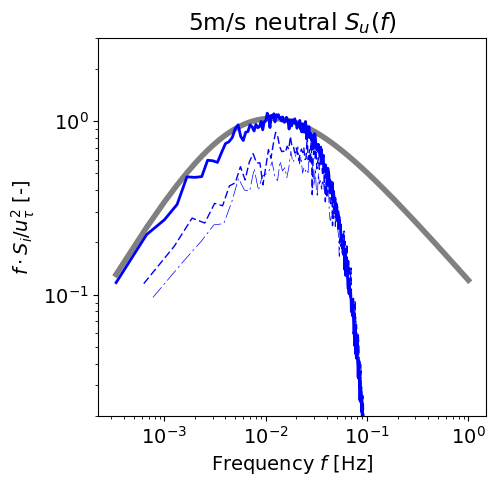

In [23]:
plt.figure(figsize=(5,5),dpi=100)
#Su_Kai20 = windspectra.getKaimal(favg, 20, 5.0)
#Su_Kai40 = windspectra.getKaimal(favg/3, 40, 5.2)
#plt.loglog(favg*20/5.00, favg*Suu_avg20/utau**2,'b--', lw=1, label='Kaimal [20]')
#plt.loglog(favg*40/5.28, favg*Suu_avg40/utau**2,'k--', lw=1, label='Kaimal [40]')
#plt.loglog(favg*20/5.00, Su_Kai20,'b', lw=3, label='Kaimal [20]')
#plt.loglog(favg*40/5.28, Su_Kai40,'k', lw=3, label='Kaimal [40]')

plt.loglog(favg['20'], Su_Kai['20'],  color='gray',  lw=4, label='Kaimal z=20')
#plt.loglog(favg['40'], Su_Kai['40'],  'k', lw=3, label='Kaimal [40]')
#plt.loglog(favg['60'], Su_Kai['60'],  'r', lw=3, label='Kaimal [60]')

plt.loglog(favg['20'], favg['20']*Suu_avg['20']/utau**2,'-',   color='blue', lw=2, label='z=20')
plt.loglog(favg['40'], favg['40']*Suu_avg['40']/utau**2, '--', color='blue', lw=1, label='z=40')
plt.loglog(favg['60'], favg['60']*Suu_avg['60']/utau**2,'-.',  color='blue', lw=0.5, label='z=60')

# Formatting options
#plt.legend(fontsize=12, frameon=False)
plt.ylim([2E-2, 3]);
plt.title('5m/s neutral $S_u(f)$')
plt.xlabel('Frequency $f$ [Hz]')
plt.ylabel('$f\cdot S_{i}/u_{\\tau}^2$ [-]')

In [17]:
#
#
#
# For reference, this is what's in windspectra.py
# --------------------
%cat windspectra.py

#!/usr/bin/env python

import numpy as np
import matplotlib.pyplot as plt
import sys

# Defaults
defaultwindow = {'choice':'tukey','alpha':0.1}
uKaimalconst  = {'a':105.0, 'b':33.0, 'alphaExp':1.0,'betaExp':5.0/3.0}
vKaimalconst  = {'a':17.0,  'b':9.5,  'alphaExp':1.0,'betaExp':5.0/3.0}
wKaimalconst  = {'a':2.1,   'b':5.3,  'alphaExp':5.0/3.0,'betaExp':1.0}

# The Tukey window
# see https://en.wikipedia.org/wiki/Window_function#Tukey_window
def tukeyWindow(N, params={'alpha':0.1}):
    alpha = params['alpha']
    w = np.zeros(N)
    L = N+1
    for n in np.arange(0, N/2 + 1):
        if ((0 <= n) and (n < 0.5*alpha*L)):
            w[n] = 0.5*(1.0 - np.cos(2*np.pi*n/(alpha*L)))
        elif ((0.5*alpha*L <= n) and (n <= N/2)):
            w[n] = 1.0
        else:
            print("Something wrong happened at n = ",n)
        if (n != 0): w[N-n] = w[n]
    return w

# FFT's a signal, returns 1-sided frequency and spectra (non-normalized)
def getFFT(t, y):
    n    = len(y)
    k    = n